In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# Optuna fitting

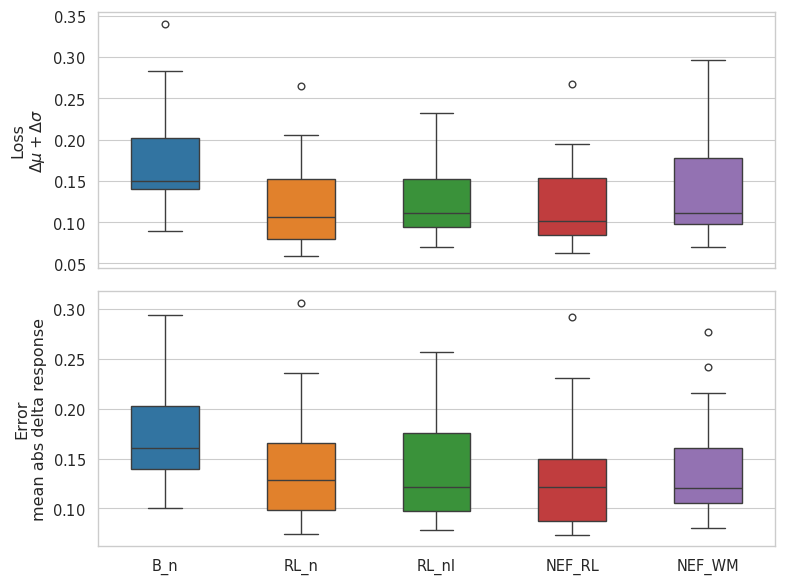

In [2]:
b_n = pd.read_pickle("data/B_n_carrabin_mar6_performance.pkl")
rl_n = pd.read_pickle("data/RL_n_carrabin_mar6_performance.pkl")
rl_nl = pd.read_pickle("data/RL_nl_carrabin_mar6_performance.pkl")
nef_rl = pd.read_pickle("data/NEF_RL_carrabin_mar6_performance.pkl")
nef_wm = pd.read_pickle("data/NEF_WM_carrabin_mar6_performance.pkl")
combined = pd.concat([b_n, rl_n, rl_nl, nef_rl, nef_wm], ignore_index=True)

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6), sharex=True)
    sns.boxplot(combined, x='type', y='loss', hue='type', ax=axes[0], palette=palette[:5], notch=False, width=0.5)
    sns.boxplot(combined, x='type', y='error', hue='type', ax=axes[1], palette=palette[:5], notch=False, width=0.5)
    axes[0].set(xlabel=None, ylabel='Loss\n'+'$\Delta \mu + \Delta \sigma$') 
    axes[1].set(xlabel=None, ylabel='Error\n'+'mean abs delta response') 
    plt.tight_layout()
    fig.savefig("plots/carrabin_performance.jpg", dpi=600)

# Compare parameters

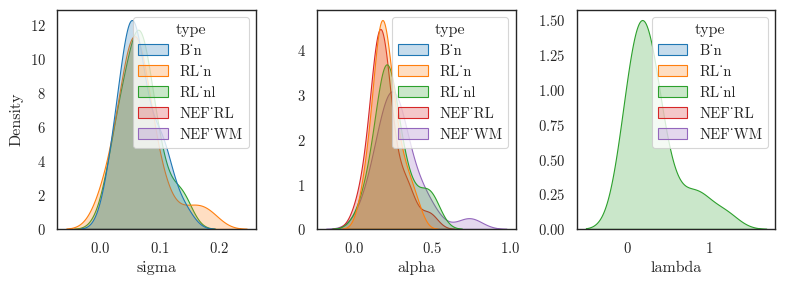

In [6]:
b_n = pd.read_pickle("data/B_n_carrabin_feb24_params.pkl")
rl_n = pd.read_pickle("data/RL_n_carrabin_feb24_params.pkl")
rl_nl = pd.read_pickle("data/RL_nl_carrabin_feb24_params.pkl")
nef_rl = pd.read_pickle("data/NEF_RL_carrabin_feb26_params.pkl")
nef_wm = pd.read_pickle("data/NEF_WM_carrabin_feb26_params.pkl")
combined = pd.concat([b_n, rl_n, rl_nl, nef_rl, nef_wm], ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,3))
sns.kdeplot(combined, x='sigma', hue='type', ax=axes[0], palette=palette[:5], fill=True, common_norm=False)
sns.kdeplot(combined, x='alpha', hue='type', ax=axes[1], palette=palette[:5], fill=True, common_norm=False)
sns.kdeplot(combined, x='lambda', hue='type', ax=axes[2], palette=palette[:5], fill=True, common_norm=False)
axes[1].set(ylabel=None)
axes[2].set(ylabel=None)
plt.tight_layout()